# <center>LIC STOCK PRICE DATA  
    

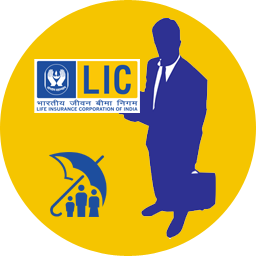

## <CENTER>ABOUT LIC COMPANY

# Life Insurance Corporation of India (LIC) is an Indian central public sector undertaking headquartered in Mumbai, Maharashtra, India. It is under the ownership of the Ministry of Finance, Government of India.
The Life insurance Corporation of India was established on 1 September 1956, when the Parliament of India passed the Life Insurance of India Act that nationalized the insurance industry in India. Over 245 insurance companies and provident societies were merged to create the state-owned Life Insurance Corporation of India.
LIC reported 290 million policyholders as of 2019, a total life fund of ₹28.3 trillion, and a total value of sold policies in the year 2018–19 of ₹21.4 million. The company also reported having settled 26 million claims in 2018–19. It ranked 98th on the 2022 Fortune Global 500 list with a revenue of ₹775,283 crores ( (US$97 billion) and a profit of ₹4,415 crores ( (US$5 ( (US$550 million).

Overview of Dataset
This dataset contains LIC data both Daily and 5-minute data from the company that got its IPO (dated 17th May 2022 to 4th Oct 2022).



##  IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# LOADING DATA SET

In [2]:
df = pd.read_csv("LICI - 5 minute data.csv")
df

,Date,Open,High,Low,Close
0,Tue May 17 2022 09:40:00 GMT+0530 (India Stand...,872.0,872.00,872.00,872.0
1,Tue May 17 2022 09:45:00 GMT+0530 (India Stand...,872.0,872.00,872.00,872.0
2,Tue May 17 2022 09:50:00 GMT+0530 (India Stand...,872.0,872.00,872.00,872.0
3,Tue May 17 2022 09:55:00 GMT+0530 (India Stand...,872.0,872.00,872.00,872.0
4,Tue May 17 2022 10:00:00 GMT+0530 (India Stand...,862.0,918.10,862.00,902.8
...,...,...,...,...,...
7341,Tue Oct 04 2022 15:05:00 GMT+0530 (India Stand...,628.5,629.30,628.35,629.0
7342,Tue Oct 04 2022 15:10:00 GMT+0530 (India Stand...,629.0,629.30,628.75,629.3
7343,Tue Oct 04 2022 15:15:00 GMT+0530 (India Stand...,629.3,629.80,629.00,629.7
7344,Tue Oct 04 2022 15:20:00 GMT+0530 (India Stand...,629.7,629.85,629.00,629.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7346 entries, 0 to 7345
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7346 non-null   object 
 1   Open    7346 non-null   float64
 2   High    7346 non-null   float64
 3   Low     7346 non-null   float64
 4   Close   7346 non-null   float64
dtypes: float64(4), object(1)
memory usage: 287.1+ KB


# 

In [4]:
df['Date'] = [dates.replace(' GMT+0530 (India Standard Time)', '') for dates in df['Date']]
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close
0,2022-05-17 09:40:00,872.0,872.0,872.0,872.0
1,2022-05-17 09:45:00,872.0,872.0,872.0,872.0
2,2022-05-17 09:50:00,872.0,872.0,872.0,872.0
3,2022-05-17 09:55:00,872.0,872.0,872.0,872.0
4,2022-05-17 10:00:00,862.0,918.1,862.0,902.8


In [5]:
df.size

36730

In [6]:
df.shape

(7346, 5)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,7346.0,699.938572,60.374226,617.90,664.10,679.850,707.7375,904.10
High,7346.0,700.593085,60.553606,618.25,664.60,680.725,708.4000,918.10
Low,7346.0,699.229499,60.176226,617.05,663.55,679.125,707.0500,902.60
Close,7346.0,699.890192,60.356893,617.85,664.05,679.750,707.8000,904.35


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7346 entries, 0 to 7345
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7346 non-null   datetime64[ns]
 1   Open    7346 non-null   float64       
 2   High    7346 non-null   float64       
 3   Low     7346 non-null   float64       
 4   Close   7346 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 287.1 KB


In [9]:
df.isnull().sum()*100

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

# <CENTER>EDA

### univarient analysis 

#### histplot

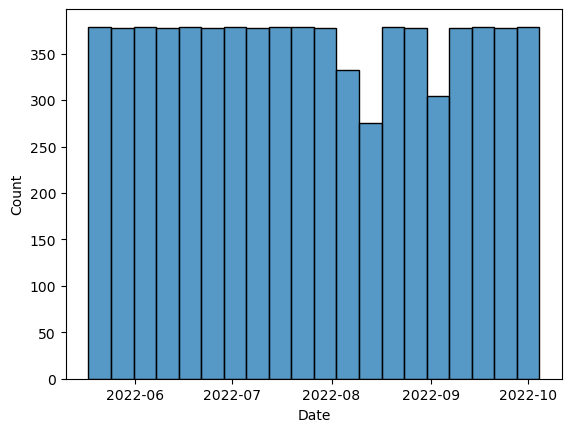

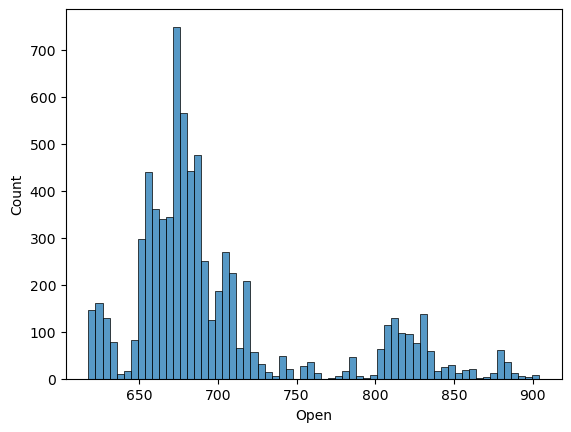

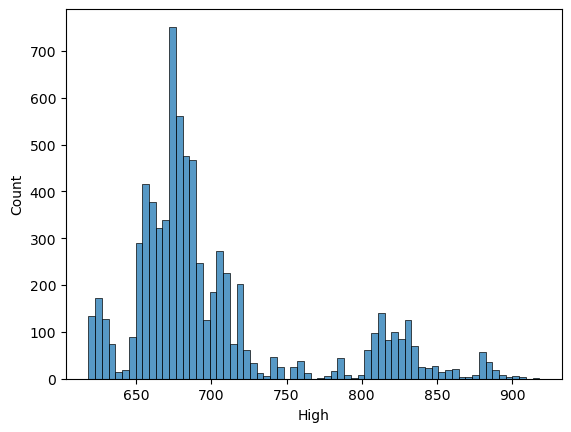

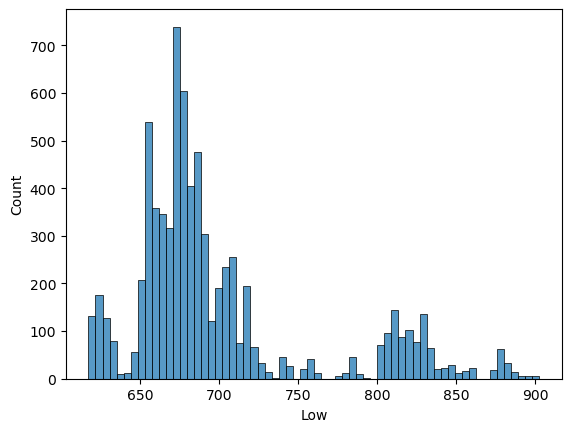

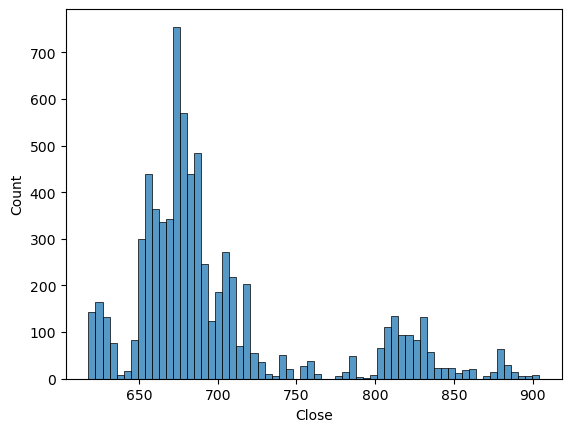

In [10]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.histplot(x = df[i])
        plt.show()

#### kdeplot

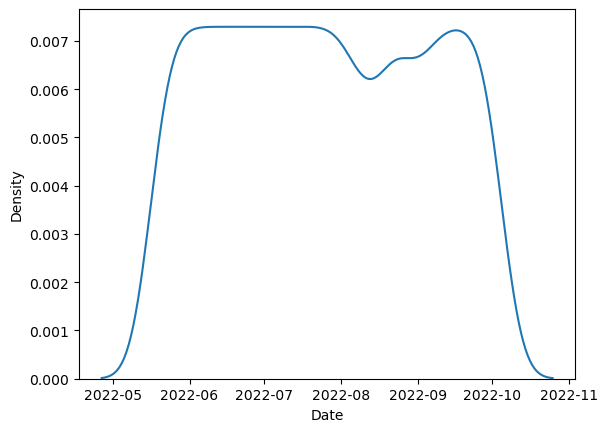

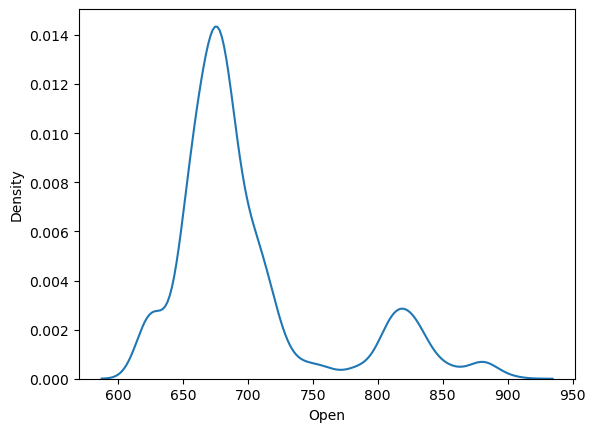

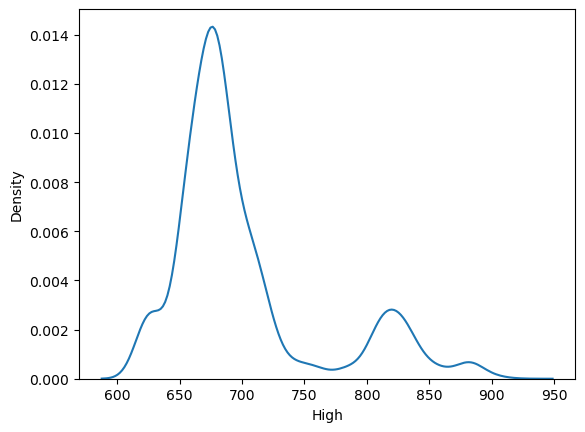

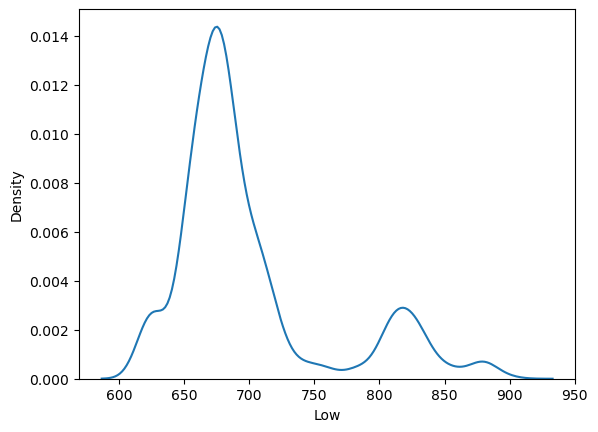

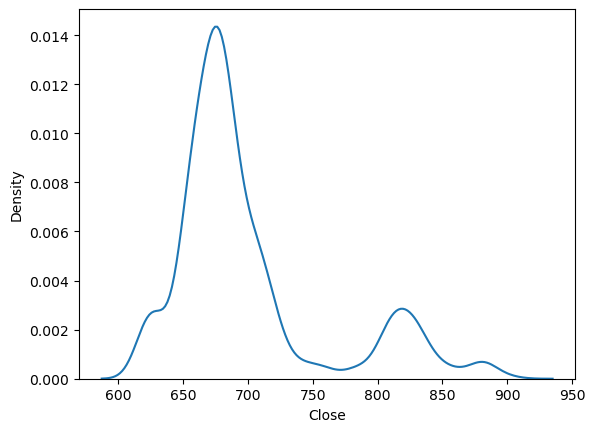

In [11]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.kdeplot(x= df[i])
        plt.show()

#### boxplot

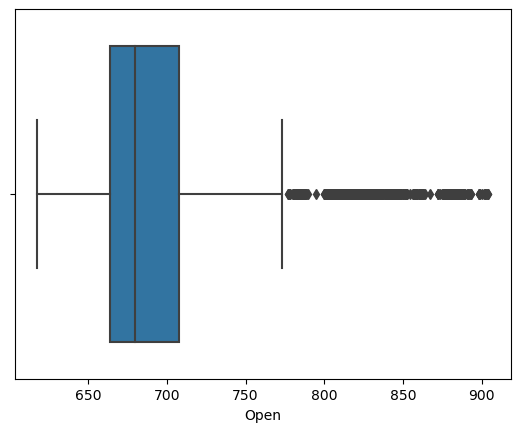

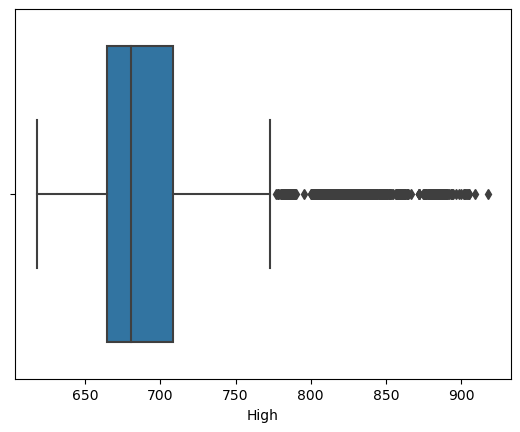

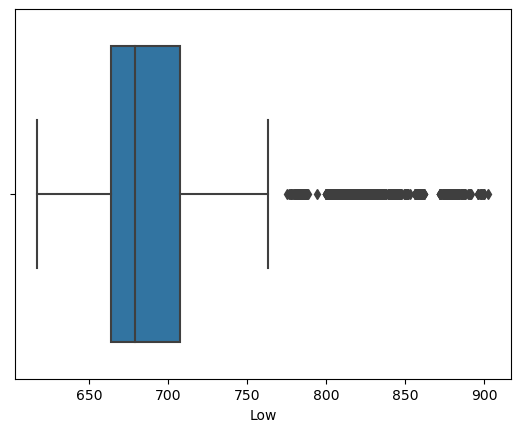

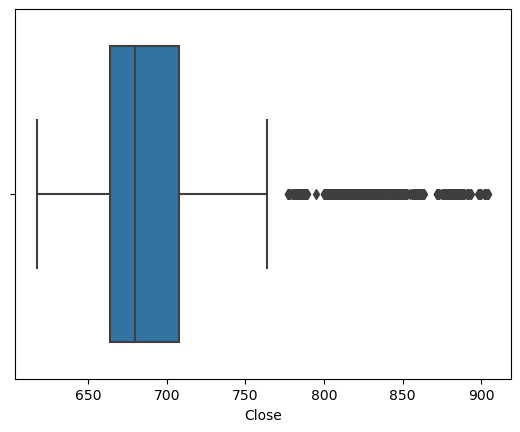

In [12]:
for i in df.columns:
    if df[i].dtypes != "datetime64[ns]":
        sns.boxplot(data=df,x=df[i])
        plt.show()

# setting outliers

In [13]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [15]:
for i in df.columns:
    if df[i].dtypes != "datetime64[ns]":
        UL,LL = outlier_limit(df[i])
        df[i] = np.where((df[i]>UL)|(df[i]<LL), np.nan, df[i])

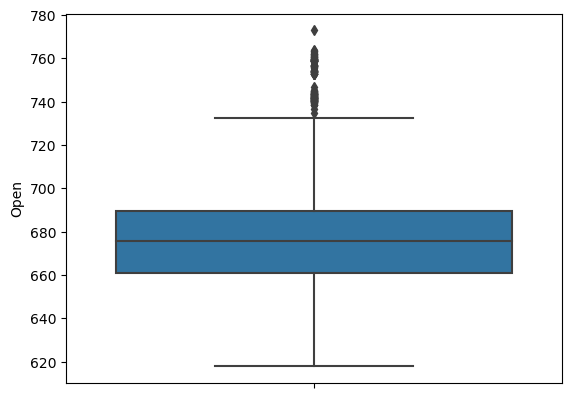

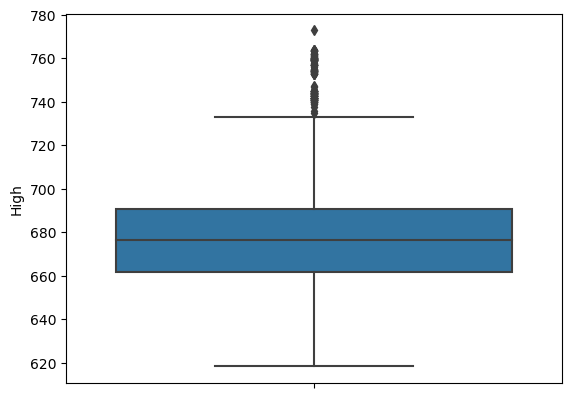

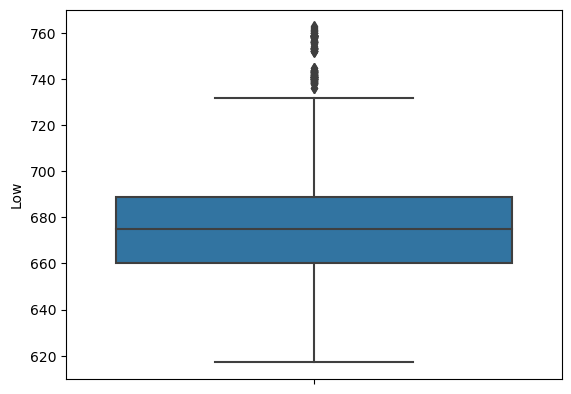

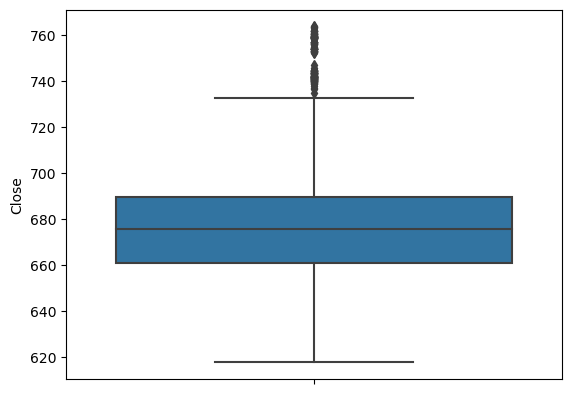

In [16]:
for i in df.columns:
    if df[i].dtypes != "datetime64[ns]":
        sns.boxplot(y = df[i])
        plt.show();

In [17]:
for i in df.columns:
    if df[i].dtypes != "datetime64[ns]":
        UL,LL = outlier_limit(df[i])
        df[i] = np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

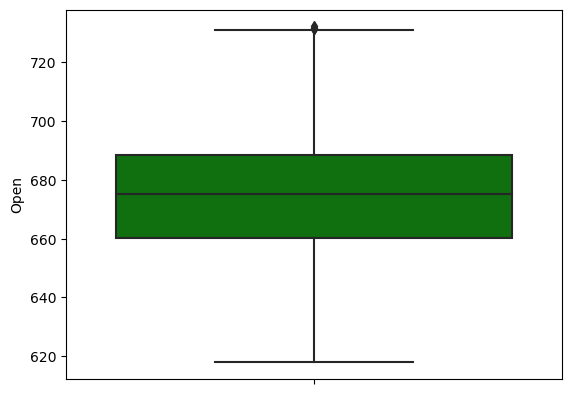

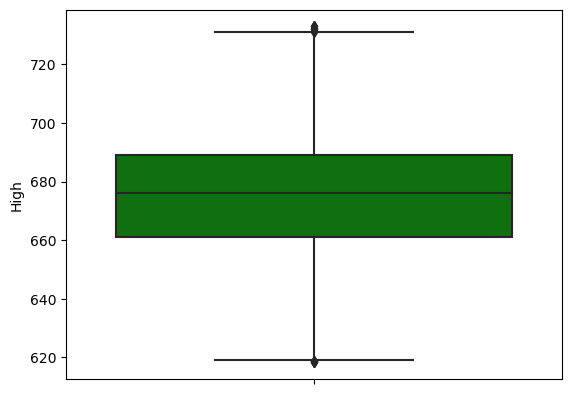

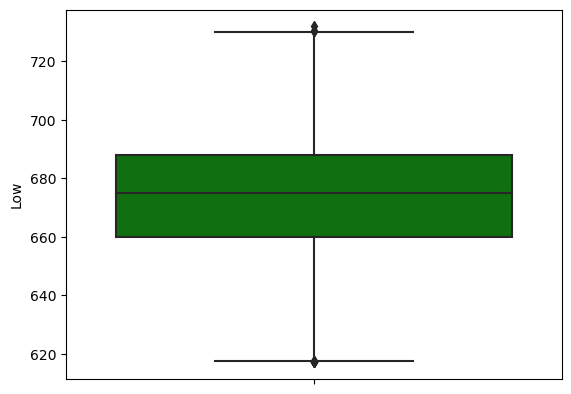

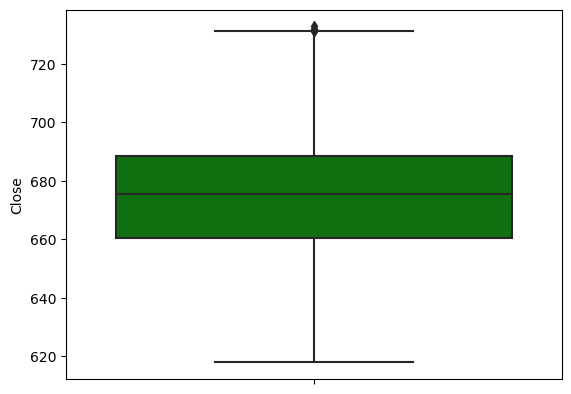

In [18]:
for i in df.columns:
    if df[i].dtypes != "datetime64[ns]":
        sns.boxplot(y = df[i], color="green")
        plt.show()

In [19]:
df.isnull().sum()

Date        0
Open     1271
High     1272
Low      1270
Close    1271
dtype: int64

In [20]:
df.Open.fillna(np.mean(df["Open"]),inplace=True)
df.High.fillna(np.mean(df["High"]),inplace=True)
df.Low.fillna(np.mean(df["Low"]),inplace=True)
df.Close.fillna(np.mean(df["Close"]),inplace=True)


In [21]:
np.mean(df["High"])

675.632869608166

In [22]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

# Label encoding the categorical columns

In [23]:
le = LabelEncoder()

In [24]:
df['Date'] = le.fit_transform(df['Date'])

In [25]:
df

,Date,Open,High,Low,Close
0,0,675.053185,675.63287,674.431402,675.015366
1,1,675.053185,675.63287,674.431402,675.015366
2,2,675.053185,675.63287,674.431402,675.015366
3,3,675.053185,675.63287,674.431402,675.015366
4,4,675.053185,675.63287,674.431402,675.015366
...,...,...,...,...,...
7341,7340,628.500000,629.30000,628.350000,629.000000
7342,7341,629.000000,629.30000,628.750000,629.300000
7343,7342,629.300000,629.80000,629.000000,629.700000
7344,7343,629.700000,629.85000,629.000000,629.400000


# Display correlation with a target variable of interest

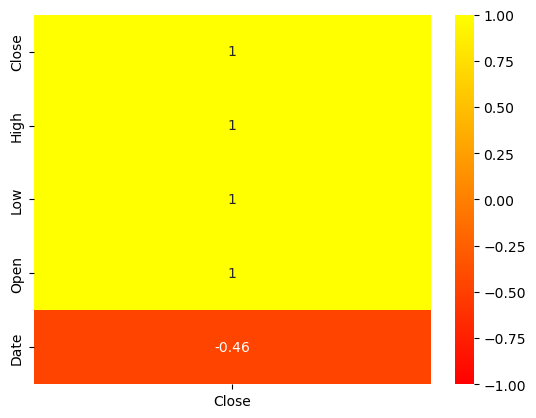

In [26]:
sns.heatmap(df.corr()[["Close"]].sort_values(by="Close", ascending=False), vmin=-1, vmax=1, annot=True,cmap="autumn");

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7346 entries, 0 to 7345
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7346 non-null   int64  
 1   Open    7346 non-null   float64
 2   High    7346 non-null   float64
 3   Low     7346 non-null   float64
 4   Close   7346 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 287.1 KB


### Lets take only the columns with good correlation with the target

In [28]:
x = df[['Date','Open','High','Low']].values

In [29]:
y = df[['Close']].values

### Feature Scaling 

In [30]:
sc = StandardScaler()

In [31]:
x = sc.fit_transform(x)

# Model Building

In [32]:
models = {
    "LinearRegression" : LinearRegression(),
    "Ridge" : Ridge(),
    "LinearSVR" : LinearSVR(),
    'Lasso' : Lasso(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(random_state=0)
}

In [33]:
for name, model in models.items():   
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.42868314523141204
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.4378195663151601
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  0.45629397833039065
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  1.2868555012803145
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  2.867791002368061
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  3.0710038618286695
*****************************************************

# model fitting

In [34]:
rfr = LinearSVR()

# splitting the data into training and testing set

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [36]:
rfr.fit(x_train, y_train)

LinearSVR()

In [37]:
print("model trained with {}".format(rfr))
training_score = rfr.score(x_train, y_train)*100
testing_score = rfr.score(x_test, y_test)*100
score = r2_score(y_test, rfr.predict(x_test))*100
mae = mean_absolute_error(y_test, rfr.predict(x_test))
mse = mean_squared_error(y_test, rfr.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with LinearSVR()
r2score:  99.95864104515844
training_score:  99.93053698681398
testing_score:  99.95864104515844
mae:  0.2508841669292874
mse:  0.19669330985800976
rmse_test:  0.44350119487777007


In [38]:
y_pred = rfr .predict(x)

# After predicting the value i decided to compare it with actual value

In [39]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,675.015366,675.011798
1,675.015366,675.011788
2,675.015366,675.011777
3,675.015366,675.011767
4,675.015366,675.011757
...,...,...
7341,629.000000,628.951915
7342,629.300000,629.102874
7343,629.700000,629.482126
7344,629.400000,629.421652


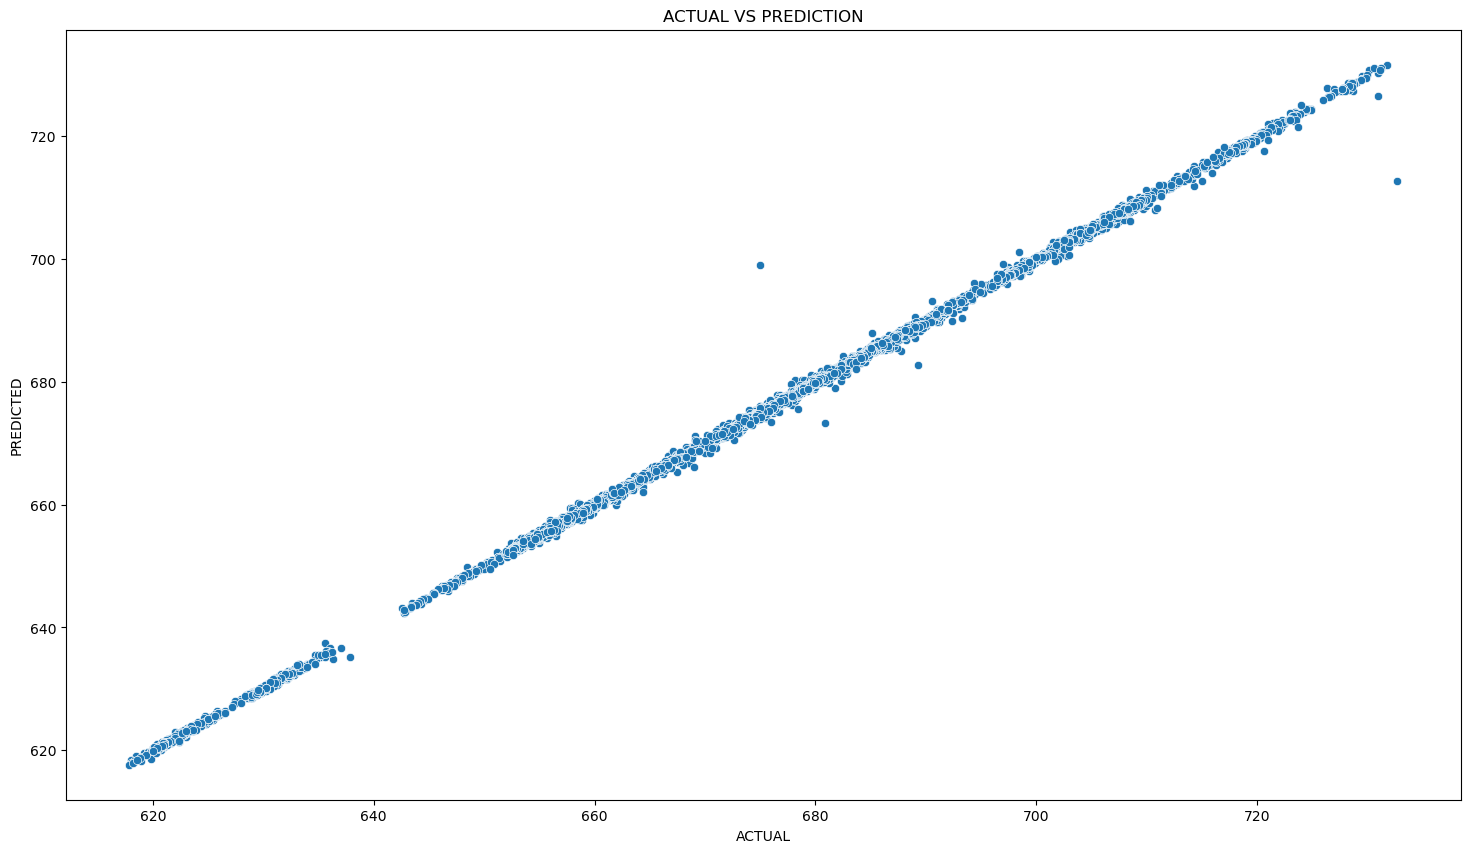

In [40]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

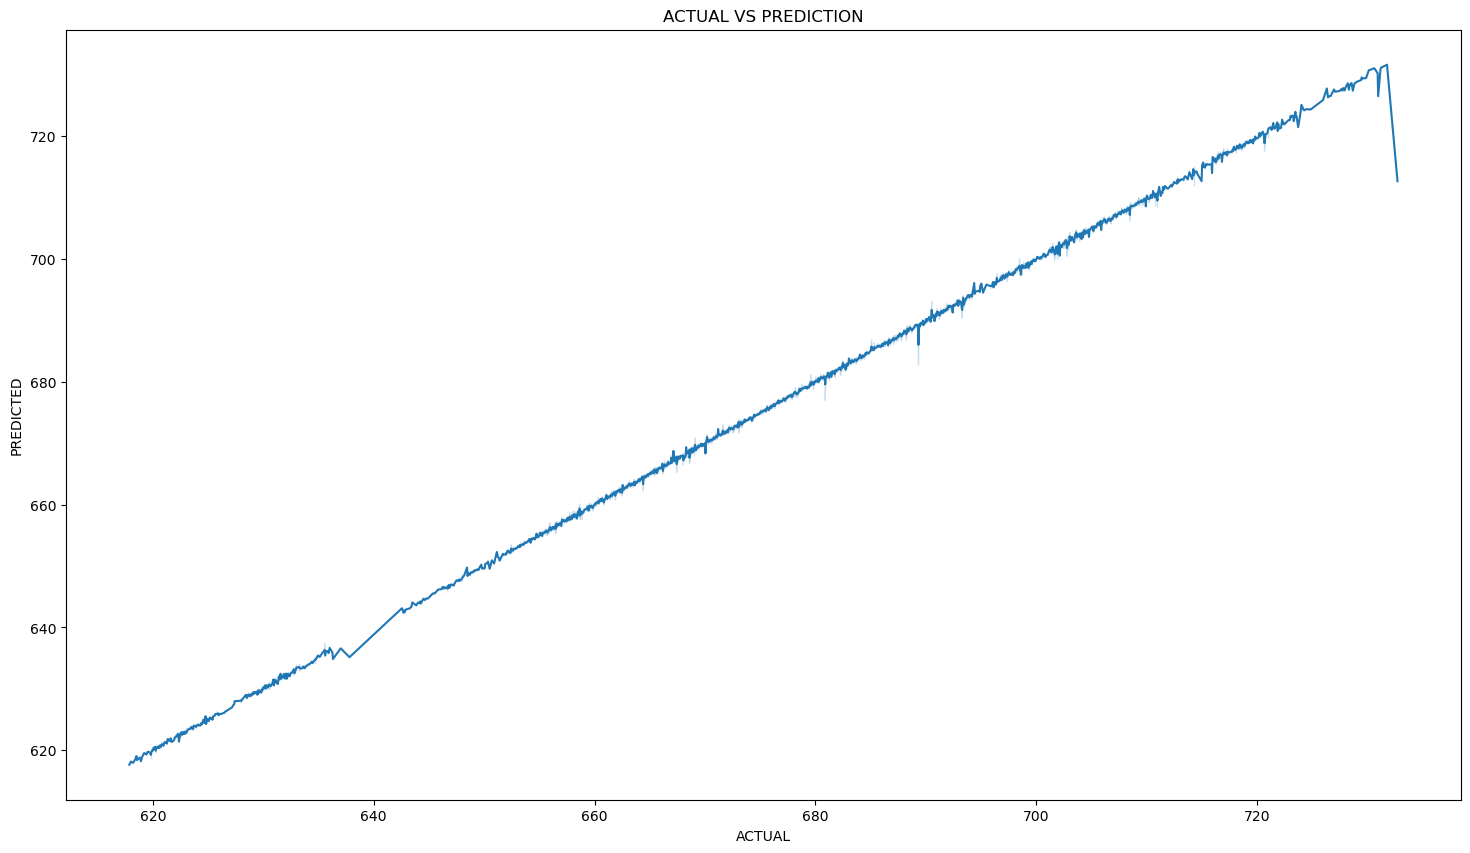

In [41]:
plt.figure(figsize=(18,10))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()